Pacientes: 569 | Variables: 30


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Clases (0=maligno, 1=benigno):
target
1    357
0    212
Name: count, dtype: int64


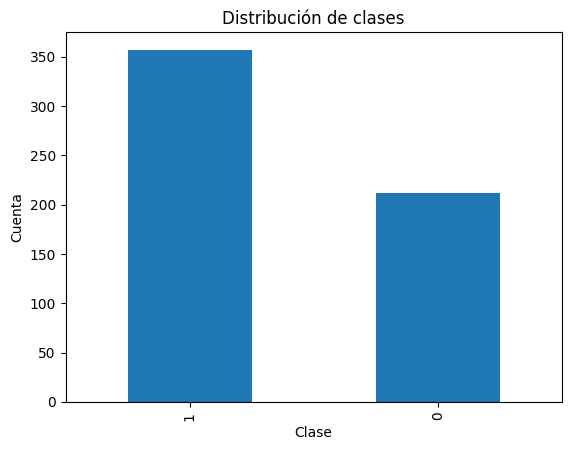

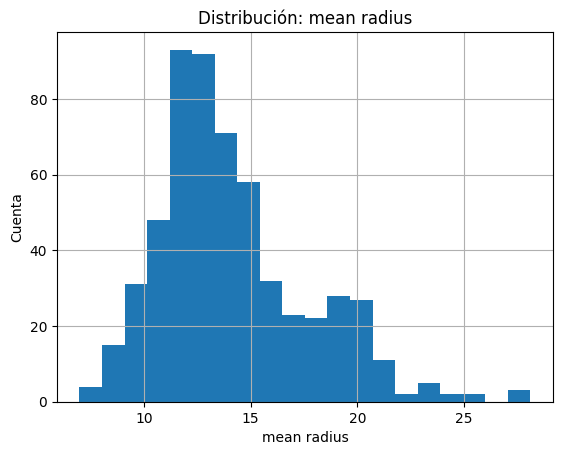

Regresión Logística:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

ROC AUC: 0.996


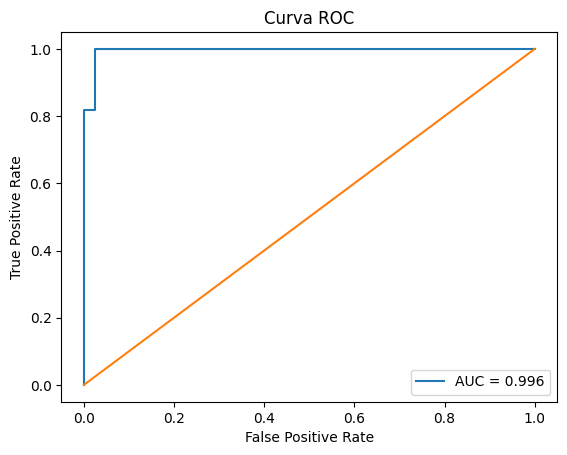

Matriz de confusión:
 [[41  1]
 [ 1 71]]
Random Forest:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

ROC AUC RF: 0.994


,feature,importance
23,worst area,0.140016
27,worst concave points,0.129530
20,worst radius,0.097696
7,mean concave points,0.090885
22,worst perimeter,0.072226
2,mean perimeter,0.069574
0,mean radius,0.068676
6,mean concavity,0.057638
3,mean area,0.049172
26,worst concavity,0.034340


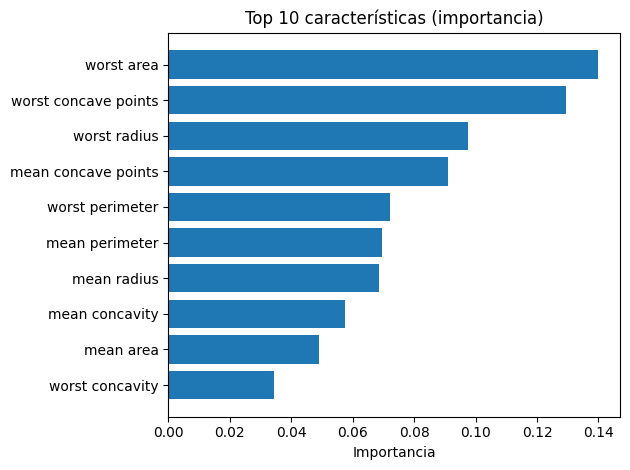

Guardado: modelo_rf_breast_cancer.joblib (descárgalo desde el panel Files de Colab)


In [1]:
# --- Preparación ---
!pip install -q scikit-learn pandas matplotlib joblib

# 1) Cargar datos
from sklearn.datasets import load_breast_cancer
import pandas as pd
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')
print('Pacientes:', X.shape[0], '| Variables:', X.shape[1])
display(X.head())
print('\nClases (0=maligno, 1=benigno):')
print(y.value_counts())

# 2) Gráficos rápidos
import matplotlib.pyplot as plt
plt.figure()
y.value_counts().plot(kind='bar')
plt.title('Distribución de clases')
plt.xlabel('Clase'); plt.ylabel('Cuenta')
plt.show()

plt.figure()
X['mean radius'].hist(bins=20)
plt.title('Distribución: mean radius')
plt.xlabel('mean radius'); plt.ylabel('Cuenta')
plt.show()

# 3) Modelo base (Regresión Logística)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
pipe_lr = Pipeline([('scaler', StandardScaler()),
                    ('clf', LogisticRegression(solver='liblinear', random_state=42))])
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
y_proba = pipe_lr.predict_proba(X_test)[:,1]
print('Regresión Logística:')
print(classification_report(y_test, y_pred))
print('ROC AUC:', round(roc_auc_score(y_test, y_proba), 3))

# 4) Curva ROC y matriz de confusión
from sklearn.metrics import roc_curve, auc, confusion_matrix
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('Curva ROC'); plt.legend(); plt.show()
cm = confusion_matrix(y_test, y_pred)
print('Matriz de confusión:\n', cm)

# 5) Random Forest + Importancias
from sklearn.ensemble import RandomForestClassifier
pipe_rf = Pipeline([('scaler', StandardScaler()),
                    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))])
pipe_rf.fit(X_train, y_train)
y_rf_pred = pipe_rf.predict(X_test)
y_rf_proba = pipe_rf.predict_proba(X_test)[:,1]
from sklearn.metrics import classification_report, roc_auc_score
print('Random Forest:')
print(classification_report(y_test, y_rf_pred))
print('ROC AUC RF:', round(roc_auc_score(y_test, y_rf_proba), 3))
feat_imp = pipe_rf.named_steps['clf'].feature_importances_
feat_df = pd.DataFrame({'feature': X.columns, 'importance': feat_imp}).sort_values('importance', ascending=False)
display(feat_df.head(10))
top10 = feat_df.head(10).sort_values('importance')
plt.figure()
plt.barh(top10['feature'], top10['importance'])
plt.title('Top 10 características (importancia)')
plt.xlabel('Importancia')
plt.tight_layout(); plt.show()

# 6) Guardar el modelo
import joblib
joblib.dump(pipe_rf, 'modelo_rf_breast_cancer.joblib')
print('Guardado: modelo_rf_breast_cancer.joblib (descárgalo desde el panel Files de Colab)')
